In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

file = os.path.join('MidwestMurderData.csv')
midwest_homicide_df = pd.read_csv(file)
midwest_homicide_df.head()

,index,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,189,197601001IA00801,"Boone, IA",IA00801,Iowa,Boone,Municipal police,FBI,No,1976,...,Unknown or not reported,Knife or cutting instrument,Relationship not determined,Other arguments,NaN,0,0,30180.0,Iowa,Rural Iowa
1,190,197601001IA04400,"Henry, IA",IA04400,Iowa,Henry County,Sheriff,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Robbery,NaN,0,0,30180.0,Iowa,Rural Iowa
2,191,197601001IA05202,"Johnson, IA",IA05202,Iowa,Iowa City,Municipal police,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,NaN,0,0,30180.0,Iowa,"Iowa City, IA"
3,192,197601001IA05701,"Linn, IA",IA05701,Iowa,Cedar Rapids,Municipal police,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Husband,Other arguments,NaN,0,0,30180.0,Iowa,"Cedar Rapids, IA"
4,193,197601001IA05703,"Linn, IA",IA05703,Iowa,Hiawatha,Municipal police,FBI,Yes,1976,...,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Brawl due to influence of alcohol,NaN,0,0,30180.0,Iowa,"Cedar Rapids, IA"


In [2]:
# Amber Start

## Many murderers walk among us as more and more homicides go unsolved.

Are homicide cases being successfully solved more frequently over time?

In [3]:
midwest_solved = midwest_homicide_df[['Year', 'Solved', 'ID']]

midwest_solved.head()

,Year,Solved,ID
0,1976,No,197601001IA00801
1,1976,Yes,197601001IA04400
2,1976,Yes,197601001IA05202
3,1976,Yes,197601001IA05701
4,1976,Yes,197601001IA05703


In [4]:
midwest_year_group = midwest_solved.groupby(['Year']).count()
midwest_year_group.head()

,Solved,ID
Year,,
1976,4209,4209
1977,4081,4081
1978,4019,4019
1979,4567,4567
1980,4670,4670


In [5]:
solved = midwest_solved.loc[midwest_solved["Solved"] == "Yes"]
midwest_solved_group = solved.groupby(['Year']).count()
midwest_solved_group.head()

,Solved,ID
Year,,
1976,3168,3168
1977,3059,3059
1978,3064,3064
1979,3394,3394
1980,3400,3400


In [6]:
midwest_solved_group["% Solved"] = midwest_solved_group["Solved"] / midwest_year_group["Solved"] * 100
midwest_solved_group = midwest_solved_group.reset_index(drop=False)
midwest_solved_group.head()

,Year,Solved,ID,% Solved
0,1976,3168,3168,75.267284
1,1977,3059,3059,74.957118
2,1978,3064,3064,76.237870
3,1979,3394,3394,74.315743
4,1980,3400,3400,72.805139


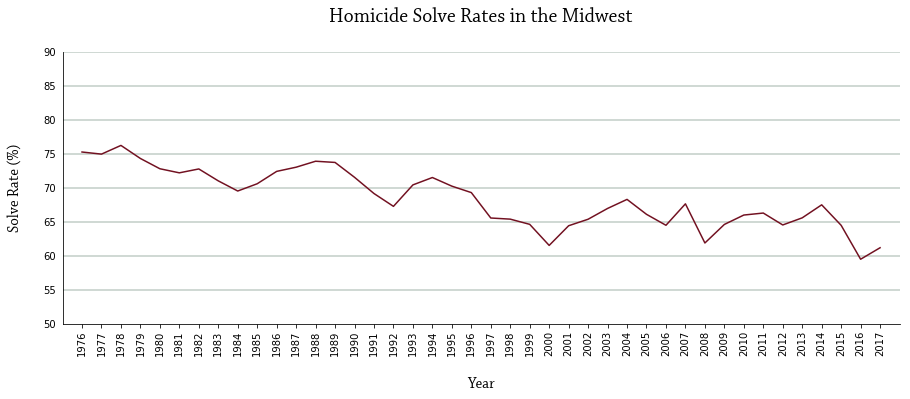

In [7]:
year = midwest_solved_group["Year"]
solved = midwest_solved_group["% Solved"]

fig, ax = plt.subplots(figsize=(15,5))

plt.plot(year, solved, color='#721121')

ax.set_title('Homicide Solve Rates in the Midwest', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Solve Rate (%)', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# plt.tick_params(
#    axis='x',
#    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

# ax.set_facecolor('seashell')

ax.hlines(55, 1975, 2018, color='#c1cdc6')
ax.hlines(60, 1975, 2018, color='#c1cdc6')
ax.hlines(65, 1975, 2018, color='#c1cdc6')
ax.hlines(70, 1975, 2018, color='#c1cdc6')
ax.hlines(75, 1975, 2018, color='#c1cdc6')
ax.hlines(80, 1975, 2018, color='#c1cdc6')
ax.hlines(85, 1975, 2018, color='#c1cdc6')
ax.hlines(90, 1975, 2018, color='#c1cdc6')

# ax.grid(color='lightgrey', linewidth=1)
# ax.set_axisbelow(True)

plt.xlim(1975, 2018)
plt.ylim(50, 90)

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.show()

In [8]:
midwest_cities = ['Chicago-Naperville-Joliet, IL-IN-WI',
                  'Columbus, OH',
                  'Des Moines, IA',
                  'Detroit-Warren-Livonia, MI', 
                  'Fargo, ND-MN',
                  'Indianapolis, IN',
                  'Kansas City, MO-KS',
                  'Milwaukee-Waukesha-West Allis, WI',
                  'Minneapolis-St. Paul-Bloomington, MN-WI',
                  'Omaha-Council Bluffs, NE-IA',
                  'Sioux Falls, SD',
                  'Wichita, KS']

cities_df = midwest_homicide_df[['MSA', 'Year', 'Solved']]
cities_df = cities_df[cities_df['MSA'].isin(midwest_cities)]
cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,MSA,Year,Solved
0,"Omaha-Council Bluffs, NE-IA",1976,Yes
1,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes
2,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes
3,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes
4,"Chicago-Naperville-Joliet, IL-IN-WI",1976,Yes


In [9]:
cities_year_group = cities_df.groupby(['MSA', 'Year']).count().reset_index()
cities_year_group.head()

,MSA,Year,Solved
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,1101
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,1123
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,1098
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,1251
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,1261


In [10]:
cities_solved = cities_df.loc[cities_df["Solved"] == "Yes"]
cities_solved = cities_solved.groupby(['MSA', 'Year']).count().reset_index()
cities_solved.head()

,MSA,Year,Solved
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,850
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,825
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,829
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,911
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,887


In [11]:
new_df = pd.merge(cities_solved, cities_year_group,  how='outer', left_on=['MSA','Year'], right_on = ['MSA','Year'])

In [12]:
new_df = new_df.rename(columns={'MSA': 'City', 
                                'Solved_x': 'Homicides Solved',
                                'Solved_y': 'Total Homicides'})
new_df.head()

,City,Year,Homicides Solved,Total Homicides
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,850.0,1101
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,825.0,1123
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,829.0,1098
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,911.0,1251
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,887.0,1261


In [13]:
new_df["% Solved"] = new_df["Homicides Solved"] / new_df["Total Homicides"] * 100
new_df.head()

,City,Year,Homicides Solved,Total Homicides,% Solved
0,"Chicago-Naperville-Joliet, IL-IN-WI",1976,850.0,1101,77.202543
1,"Chicago-Naperville-Joliet, IL-IN-WI",1977,825.0,1123,73.463936
2,"Chicago-Naperville-Joliet, IL-IN-WI",1978,829.0,1098,75.500911
3,"Chicago-Naperville-Joliet, IL-IN-WI",1979,911.0,1251,72.821743
4,"Chicago-Naperville-Joliet, IL-IN-WI",1980,887.0,1261,70.340999


In [14]:
chicago = new_df[new_df["City"] == 'Chicago-Naperville-Joliet, IL-IN-WI']
indy = new_df[new_df["City"] == 'Indianapolis, IN']
columbus = new_df[new_df["City"] == 'Columbus, OH']
detroit = new_df[new_df["City"] == 'Detroit-Warren-Livonia, MI']
milwaukee = new_df[new_df["City"] == 'Milwaukee-Waukesha-West Allis, WI']
kc = new_df[new_df["City"] == 'Kansas City, MO-KS']
omaha = new_df[new_df["City"] == 'Omaha-Council Bluffs, NE-IA']
mpls = new_df[new_df["City"] == 'Minneapolis-St. Paul-Bloomington, MN-WI']
wichita = new_df[new_df["City"] == 'Wichita, KS']
desmoines = new_df[new_df["City"] == 'Des Moines, IA']
fargo = new_df[new_df["City"] == 'Fargo, ND-MN']
sf = new_df[new_df["City"] == 'Sioux Falls, SD']

In [15]:
mpls.head()

,City,Year,Homicides Solved,Total Homicides,% Solved
323,"Minneapolis-St. Paul-Bloomington, MN-WI",1976,54.0,78,69.230769
324,"Minneapolis-St. Paul-Bloomington, MN-WI",1977,62.0,75,82.666667
325,"Minneapolis-St. Paul-Bloomington, MN-WI",1978,43.0,54,79.629630
326,"Minneapolis-St. Paul-Bloomington, MN-WI",1979,55.0,75,73.333333
327,"Minneapolis-St. Paul-Bloomington, MN-WI",1980,58.0,75,77.333333


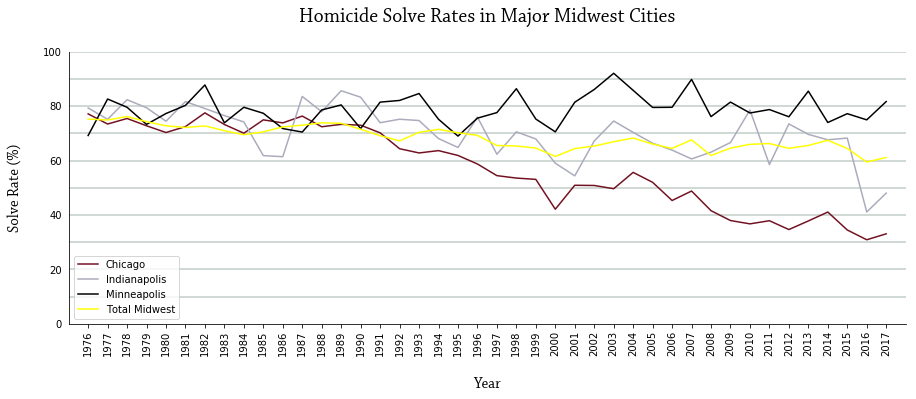

In [18]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(chicago["Year"], chicago["% Solved"], color='#721121', label="Chicago")
plt.plot(indy["Year"], indy["% Solved"], color='#AAABBC', label="Indianapolis")
# plt.plot(detroit["Year"], detroit["% Solved"], color='#8B8982', label="Detroit")
# plt.plot(milwaukee["Year"], milwaukee["% Solved"], color='#373F47', label="Milwaukee")
plt.plot(mpls["Year"], mpls["% Solved"], color='black', label="Minneapolis")
plt.plot(year, solved, color='yellow', label = "Total Midwest")

ax.set_title('Homicide Solve Rates in Major Midwest Cities', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
ax.set_xlabel('Year', labelpad=20, fontname='Chaparral Pro', fontsize=15)
ax.set_ylabel('Solve Rate (%)', labelpad=20, fontname='Chaparral Pro', fontsize=15)
 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# plt.tick_params(
#    axis='x',
#    bottom=False)

plt.tick_params(
    axis='y',
    left=False)

# ax.set_facecolor('seashell')

ax.hlines(10, 1975, 2018, color='#c1cdc6')
ax.hlines(20, 1975, 2018, color='#c1cdc6')
ax.hlines(30, 1975, 2018, color='#c1cdc6')
ax.hlines(40, 1975, 2018, color='#c1cdc6')
ax.hlines(50, 1975, 2018, color='#c1cdc6')
ax.hlines(60, 1975, 2018, color='#c1cdc6')
ax.hlines(70, 1975, 2018, color='#c1cdc6')
ax.hlines(80, 1975, 2018, color='#c1cdc6')
ax.hlines(90, 1975, 2018, color='#c1cdc6')
ax.hlines(100, 1975, 2018, color='#c1cdc6')

# ax.grid(color='lightgrey', linewidth=1)
# ax.set_axisbelow(True)

plt.xlim(1975, 2018)
plt.ylim(0, 100)

plt.legend()

plt.xticks(np.arange(1976, 2018, step=1), rotation=90)

plt.show()

In [ ]:
# Amber End

In [ ]:
# Eric Start

In [ ]:
# Eric End

In [ ]:
# Bimi Start

In [ ]:
# Bimi End

In [ ]:
# Devin Start

In [ ]:
# Devin End

In [ ]:
# Matt Start

In [ ]:
# Matt End